<a href="https://colab.research.google.com/github/fiza-azam/Advanced-Computer-Vision/blob/main/Face_Expression_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import numpy as np


!pip install -U tensorflow-addons

import tensorflow_addons as tfa

     |████████████████████████████████| 1.1 MB 5.2 MB/s 


#Working with Data

In [ ]:
import tarfile
my_tar = tarfile.open('/content/drive/MyDrive/CV/train_and_val_set.tar')
my_tar.extractall('./traindata')
my_tar.close()

In [ ]:
import tarfile
my_tar = tarfile.open('/content/drive/MyDrive/CV/test_set.tar')
my_tar.extractall('./testdata')
my_tar.close()

In [ ]:
import os
def CountFiles(path, name):
  # folder path
  dir_path = path
  count = 0
  # Iterate directory
  for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
  print(name, count)
  

In [ ]:
#Count Number of Images in Train Set
CountFiles('/content/traindata/train_set/images', "Train Images")

Train Images 287651


In [ ]:
#Count Number of Annotations in Train Set
CountFiles('/content/traindata/train_set/annotations', "Train Annotations") #Each image has 4 annotations 

Train Annotations 1150604


In [ ]:
#Count Number of Images in Test Set
CountFiles('/content/testdata/val_set/images', "Test Images")

Test Images 3999


In [ ]:
#Count Number of Annotations in Test Set
CountFiles('/content/testdata/val_set/annotations', "Test Annotations") #Each Image has 4 annotations

Test Annotations 15996


##Explore Data

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
import cv2

def show(img):
    io.imshow(img)
    plt.show()

In [ ]:
import numpy as np
aro = np.load('/content/testdata/val_set/annotations/1001_aro.npy')
aro

array('0.00483933', dtype='<U10')

In [ ]:
exp = np.load('/content/testdata/val_set/annotations/1001_exp.npy')
exp

array('0', dtype='<U1')

In [ ]:
lnd = np.load('/content/testdata/val_set/annotations/0_lnd.npy')
lnd

array([-6.66666667e-03,  8.14980117e+01,  2.81000000e+00,  1.07939181e+02,
        8.13666667e+00,  1.34373801e+02,  1.53233333e+01,  1.58335906e+02,
        2.76100000e+01,  1.80454269e+02,  4.71566667e+01,  1.98033684e+02,
        6.91700000e+01,  2.11663626e+02,  9.08000000e+01,  2.21347368e+02,
        1.11950000e+02,  2.24602573e+02,  1.32963333e+02,  2.21380117e+02,
        1.53270000e+02,  2.10749942e+02,  1.72553333e+02,  1.97293567e+02,
        1.91013333e+02,  1.81544795e+02,  2.02653333e+02,  1.60559532e+02,
        2.09523333e+02,  1.36106199e+02,  2.14586667e+02,  1.08826667e+02,
        2.16303333e+02,  7.93169591e+01,  1.65166667e+01,  6.81300585e+01,
        3.25433333e+01,  5.78863158e+01,  5.25433333e+01,  5.68449123e+01,
        7.39066667e+01,  6.00149708e+01,  9.42966667e+01,  6.67316959e+01,
        1.28733333e+02,  6.53791813e+01,  1.51076667e+02,  5.92879532e+01,
        1.71943333e+02,  5.56921637e+01,  1.91793333e+02,  5.83513450e+01,
        2.05030000e+02,  

In [ ]:
val = np.load('/content/testdata/val_set/annotations/1001_val.npy')
val

array('-0.135501', dtype='<U9')

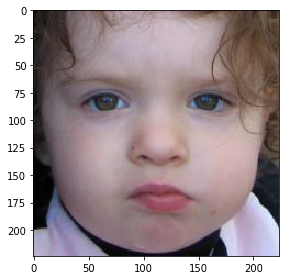

In [ ]:
image_path = "/content/testdata/val_set/images/0.jpg"

scikit_image = io.imread(image_path)
show(scikit_image)

##Data Assembeling

In [ ]:
import pandas as pd 

df = pd.DataFrame(columns = ['Image', 'Valence', 'Arousal', 'Expression'])
print(df)

Empty DataFrame
Columns: [Image, Valence, Arousal, Expression]
Index: []


In [ ]:
#Give Image directory and Annotations directory path to a function
def FormCsv(imagePath, annotationPath):
  
  # folder paths
  imagePath = imagePath
  annotationPath = annotationPath
 
  # Iterate directory
  df = pd.DataFrame(columns = ['Image', 'Valence', 'Arousal', 'Expression'])
  for path in os.listdir(imagePath):
    #Read image and its annotations from a folder
    img = path[:-4]
    val = np.load(annotationPath+"/"+path[:-4]+"_val.npy")
    aro =  np.load(annotationPath+"/"+path[:-4]+"_aro.npy")
    exp =  np.load(annotationPath+"/"+path[:-4]+"_exp.npy")
    #Store image and annotation in a dataframe
    df = df.append({"Image": img, "Valence": val, "Arousal": aro, "Expression": exp}, ignore_index = True)
  return df

In [ ]:
#Read Train Data
trainDf = FormCsv('/content/traindata/train_set/images', '/content/traindata/train_set/annotations')

In [ ]:
df = trainDf.sort_values("Image")
df.to_csv('/content/drive/MyDrive/train.csv')

In [ ]:
len(df.index)

In [ ]:
#Read Test Data
df = FormCsv('/content/testdata/val_set/images', '/content/testdata/val_set/annotations')

In [ ]:
df

In [ ]:
df = df.sort_values("Image")
df

In [ ]:
df.to_csv('Test.csv', index=False)

In [ ]:
testDF = pd.read_csv('/content/test.csv')
testDF.head()

In [ ]:
trainDF = pd.read_csv('/content/train.csv')
trainDF.head()

##Data Augmentation

In [ ]:
df = pd.read_csv("/content/TrainFinal.csv")

In [ ]:
import plotly.graph_objects as go
def plot_distribution(pd_series):
    labels = pd_series.value_counts().index.tolist()
    counts = pd_series.value_counts().values.tolist()
    
    pie_plot = go.Pie(labels=labels, values=counts, hole=.3)
    fig = go.Figure(data=[pie_plot])
    fig.update_layout(title_text='Distribution for %s' % pd_series.name)
    
    fig.show()

In [ ]:
plot_distribution(df['Expression'])

In [ ]:
dftest = pd.read_csv("/content/TestFinal.csv")

In [ ]:
plot_distribution(dftest['Expression'])

Training Data augmentation

In [ ]:
total = df.shape[0]
total

3472

In [ ]:
for x in range(0, 8):
  print(str(x)+':', df[df['Expression']==x].shape[0])

0: 1004
1: 1005
2: 346
3: 315
4: 131
5: 78
6: 517
7: 76


since the data with Expression labels 5 and 7 are less in number therefore we will increase the data by so that each of these labels have at least 100 images. <br>
Manual Augmentation would be performed on the data using Open CV library.

In [ ]:
# read data records in DF with Expression labels 5 and 6
#Dataframe for Expression  = 5
expr5 = df[df["Expression"]==5]

#Dataframe for Expression = 7
expr7 = df[df["Expression"]==7]

In [ ]:
expr5 = expr5.reset_index()
expr5.head()

index  Image   Valence   Arousal  Expression
0    114  92756 -0.774336  0.479351           5
1    124  92858 -0.696864  0.479094           5
2    128  92896 -0.480721  0.274338           5
3    131  92908 -0.445038  0.203976           5
4    136  92951 -0.709555  0.449385           5

In [ ]:
expr7 = expr7.reset_index()
expr7.head()

index  Image   Valence   Arousal  Expression
0      0  90628 -0.648471  0.653310           7
1      1  90721 -0.154859  0.571041           7
2      2  90802 -0.658449  0.668984           7
3      3  90836 -0.445219  0.527487           7
4      4   9105 -0.668984  0.658449           7

In [ ]:
import numpy as np
import imutils
def lightChange(image, path, img):
  contrast = 0.8
  brightness = 60
  image = cv2.convertScaleAbs(image, alpha=contrast, beta=brightness)
  #plt.imshow(image)
  cv2.imwrite(path+'/'+str(int(img))+"111111.jpg", image)
  return image

def flip(image, path, img):
  image = cv2.flip(image, 1)
  #plt.imshow(image)
  cv2.imwrite(path+'/'+str(int(img))+"111111.jpg", image)
  return image


def rotate(image, path, img):
  shape = (image.shape[0], image.shape[1])
  rotate = imutils.rotate_bound(image, 45)
  rotate = cv2.resize(rotate, shape, interpolation = cv2.INTER_AREA)
  #plt.imshow(rotate)
  cv2.imwrite(path+'/'+str(int(img))+"111111.jpg", rotate)
  return image

In [ ]:
import random 
def augmentation(augDF, readPath, savePath, out):
  augList = ['light', 'flip', 'rotate']
  aug = random.choice(augList) 
  df2 = pd.DataFrame()
  df = augDF
  df.reset_index()
  for x in range(0, 24):
    img = df.loc[x]['Image']  #prob
    val = df.loc[x]['Valence']
    aro = df.loc[x]['Arousal']
    exp = df.loc[x]['Expression']
    path = readPath
    image = cv2.imread(path+"/"+str(int(img))+".jpg")
    #updatedImg = np.array()
    if aug == 'light':
      lightChange(image, savePath, img)
    if aug == 'flip':
      flip(image, savePath, img)
    if aug == 'rotate': 
      rotate(image, savePath, img)
    df2 = {'Image': str(int(img))+"111111" , 'Valence': val, 'Arousal': aro, 'Expression': exp}
    out = out.append(df2, ignore_index = True)
  return out

In [ ]:
out = augmentation(expr5, '/content/traindata/train_set/images', '/content/traindata/train_set/images', df)

In [ ]:
for x in range(0, 8):
  print(str(x)+':', out[out['Expression']==x].shape[0])

0: 1004
1: 1005
2: 346
3: 315
4: 131
5: 102
6: 517
7: 76


In [ ]:
out = augmentation(expr7, '/content/traindata/train_set/images', '/content/traindata/train_set/images', out)

In [ ]:
for x in range(0, 8):
  print(str(x)+':', out[out['Expression']==x].shape[0])

0: 1004
1: 1005
2: 346
3: 315
4: 131
5: 102
6: 517
7: 100


In [ ]:
#Plotting balanced dataset with augmented data
plot_distribution(out['Expression'])

In [ ]:
out.to_csv('trainupdatedrecords.csv', index=False)

In [ ]:
out.shape[0]

3520

delete from here

In [ ]:
# import pandas as pd
# df = pd.read_csv("/content/test.csv")

In [ ]:
# #delete later code to delete records
# count = 0
# val = 78
# label = 7
# for index, row in df.iterrows():
#   if((int(df.loc[index]['Expression'])==label) and (count <= val)):
#     df = df.drop(labels=index, axis=0)
#     count = count + 1
#   if(count>val):
#     break 


In [ ]:
# for x in range(0,8):
#   count = 0
#   val = 399
#   label = x
#   for index, row in df.iterrows():
#     if((int(df.loc[index]['Expression'])==label) and (count <= val)):
#       df = df.drop(labels=index, axis=0)
#       count = count + 1

In [ ]:
# for x in range(0, 8):
#   print(str(x)+':', df[df['Expression']==x].shape[0])

In [ ]:
# df.shape[0]

In [ ]:
# df.to_csv('TestFinal.csv', index=False)

##Data Preprocessing

In [ ]:
import keras.layers as layers 
from keras import Model 
import tensorflow as tf
import numpy as np

In [ ]:
def imgToArray(df, path):
  reshape = []
  df = df.reset_index()  # make sure indexes pair with number of rows
  for index, row in df.iterrows():
    img = int(df.loc[index]["Image"])
    image = cv2.imread(path+"/"+str(img)+".jpg", cv2.IMREAD_GRAYSCALE)
    image_reshape = image.reshape(224, 224, 1).astype('float32') #reshape image
    reshape.append(image_reshape) 
    print("Image:"+str(img))
  reshape = np.asarray(reshape, dtype='float32') #convert to float
  #reshape = reshape/255 #normalize images
  return reshape

In [ ]:
X = imgToArray(out, "/content/traindata/train_set/images" )

In [ ]:
X = X/255 #normalize images

In [ ]:
X.shape

(3520, 224, 224, 1)

In [ ]:
Y_train_val = out["Valence"]
Y_train_aro = out["Arousal"]
Y_train_exp = out["Expression"]

In [ ]:
Y_train_val = Y_train_val.to_numpy(dtype='float32')
Y_train_aro = Y_train_aro.to_numpy(dtype='float32')
Y_train_exp = Y_train_exp.to_numpy(dtype=int)

In [ ]:
test = pd.read_csv('/content/TestFinal.csv')

In [ ]:
X_test = imgToArray(test, "/content/testdata/val_set/images" )

In [ ]:
X_test = X_test/255

In [ ]:
Y_test_val = test["Valence"]
Y_test_aro = test["Arousal"]
Y_test_exp = test["Expression"]

In [ ]:
Y_test_val = Y_test_val.to_numpy(dtype='float32')
Y_test_aro = Y_test_aro.to_numpy(dtype='float32')
Y_test_exp = Y_test_exp.to_numpy(dtype=int)

In [ ]:
from sklearn.model_selection import train_test_split

#divide data to train and validation set 
X_train, X_val, y_aro_train, y_aro_val, y_vale_train, y_vale_val, y_exp_train, y_exp_val = train_test_split(X, Y_train_aro, Y_train_val, Y_train_exp, test_size=0.33, random_state=1, stratify=Y_train_exp)


In [ ]:
#convert to categories
from keras.utils import np_utils

y_train_exp = np_utils.to_categorical(y_exp_train)
y_val_exp = np_utils.to_categorical(y_exp_val)

#CNN Architectures

##DenseNet121

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 109, 109, 64  3200        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 109, 109, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

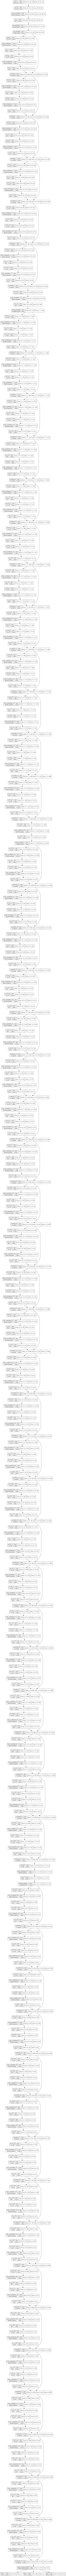

In [ ]:
# Dense Net 121 
import tensorflow
#from keras import layers, Input, Model
from tensorflow.keras.utils import plot_model
#from keras.layers import Activation, Dense 

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

def stem(inputs): 
  """ The Stem Convolution Group 
  inputs : input tensor """ 
  # First large convolution for abstract features for input 230 x 230 and output 
  # 112 x 112 
  x = layers.Conv2D(64, (7, 7), strides=2)(inputs) 
  x = layers.BatchNormalization()(x) 
  x = layers.ReLU()(x) 
  # Add padding so when downsampling we fit shape 56 x 56 
  x = layers.ZeroPadding2D(padding=((1, 1), (1, 1)))(x) 
  x = layers.MaxPooling2D((3, 3), strides=2)(x) 
  return x

def dense_block(x, nblocks, nb_filters):
   """ Construct a Dense Block         
   x         : input layer         
   nblocks   : number of residual blocks in dense block         
   nb_filters: number of filters in convolution layer in residual block     
   """     
   # Construct a group of residual blocks     
   for _ in range(nblocks):        
     x = residual_block(x, nb_filters)    
   return x 

def residual_block(x, nb_filters):    
   """ Construct Residual Block         
   x         : input layer         
   nb_filters: number of filters in convolution layer in residual block     
   """     
   shortcut = x # remember input tensor into residual block       
   # Bottleneck convolution, expand filters by 4 (DenseNet-B)     
   x = layers.Conv2D(4 * nb_filters, (1, 1), strides=(1, 1))(x)     
   x = layers.BatchNormalization()(x)    
   x = layers.ReLU()(x)       
   # 3 x 3 convolution with padding=same to preserve same shape of feature maps     
   x = layers.Conv2D(nb_filters, (3, 3), strides=(1, 1), padding='same')(x)      
   x = layers.BatchNormalization()(x)     
   x = layers.ReLU()(x)        
   
   # Concatenate the input (identity) with the output of the residual block     
   # Concatenation (vs. merging) provides Feature Reuse between layers     
   x = layers.concatenate([shortcut, x])     
   return x 

def trans_block(x, reduce_by):     
  """ Construct a Transition Block         
  x        : input layer         
  reduce_by: percentage of reduction of feature maps     
  """       
  # Reduce (compression) the number of feature maps (DenseNet-C)     
  # shape[n] returns a class object. We use int() to cast it into the dimension     
  # size     
  nb_filters = int( int(x.shape[3]) * reduce_by )       
  # Bottleneck convolution      
  x = layers.Conv2D(nb_filters, (1, 1), strides=(1, 1))(x)     
  x = layers.BatchNormalization()(x)   
  x = layers.ReLU()(x) 
  # Use mean value (average) instead of max value sampling when pooling     
  # reduce by 75%    
  x = layers.AveragePooling2D((2, 2), strides=(2, 2))(x)     
  return x 

inputs = Input(shape=(224, 224, 1))  
# Create the Stem Convolution Group 
x = stem(inputs)  
# number of residual blocks in each dense block 
blocks = [6, 12, 24, 16] 

# pop off the list the last dense block 
last   = blocks.pop() 

# amount to reduce feature maps by (compression) during transition blocks 
reduce_by = 0.5  
# number of filters in a convolution block within a residual block 
nb_filters = 32 


# Create the dense blocks and interceding transition blocks 
for nblocks in blocks:     
  x = dense_block(x, nblocks, nb_filters)     
  x = trans_block(x, reduce_by) 


# Add the last dense block w/o a following transition block 
x = dense_block(x, last, nb_filters)  
# Classifier 
# Global Average Pooling will flatten the 7x7 feature maps into 1D feature maps 
x = layers.GlobalAveragePooling2D()(x) 
# Fully connected output layer (classification) 
out_class = layers.Dense(8, activation='softmax')(x)
#valenece output
out_val = Dense(1, activation='linear')(x)
# arousal output
out_aro = Dense(1, activation='linear')(x)
model = Model(inputs, outputs=[out_val, out_aro, out_class]) 
model.summary() 
plot_model(model, to_file='model.png', show_shapes=True)









In [ ]:
#X_train, X_val, y_aro_train, y_aro_val, y_vale_train, y_vale_val, y_exp_train, y_exp_val

model = Model(inputs=inputs, outputs=[out_val, out_aro, out_class])
model.compile(loss=['mse','mse', 'categorical_crossentropy'], optimizer='adam', metrics=['mae', 'mse', 'accuracy'] )

In [ ]:
history = model.fit(X_train,[y_vale_train, y_aro_train, y_train_exp], validation_data=(X_val, [y_vale_val, y_aro_val, y_val_exp]), epochs=5, batch_size=70, verbose=1)

Epoch 1/5
34/34 [==============================] - 1539s 45s/step - loss: 1.8508 - dense_1_loss: 0.1928 - dense_2_loss: 0.1195 - dense_loss: 1.5385 - dense_1_mae: 0.3524 - dense_1_mse: 0.1928 - dense_1_accuracy: 0.0293 - dense_2_mae: 0.2817 - dense_2_mse: 0.1195 - dense_2_accuracy: 0.0314 - dense_mae: 0.1721 - dense_mse: 0.0865 - dense_accuracy: 0.4470 - val_loss: 2.4242 - val_dense_1_loss: 0.2700 - val_dense_2_loss: 0.2443 - val_dense_loss: 1.9100 - val_dense_1_mae: 0.4450 - val_dense_1_mse: 0.2700 - val_dense_1_accuracy: 0.0353 - val_dense_2_mae: 0.3808 - val_dense_2_mse: 0.2443 - val_dense_2_accuracy: 0.0327 - val_dense_mae: 0.2036 - val_dense_mse: 0.1046 - val_dense_accuracy: 0.2866
Epoch 2/5
34/34 [==============================] - 1557s 46s/step - loss: 1.7246 - dense_1_loss: 0.1790 - dense_2_loss: 0.1096 - dense_loss: 1.4361 - dense_1_mae: 0.3369 - dense_1_mse: 0.1790 - dense_1_accuracy: 0.0293 - dense_2_mae: 0.2686 - dense_2_mse: 0.1096 - dense_2_accuracy: 0.0318 - dense_mae: 0

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'dense_1_loss', 'dense_2_loss', 'dense_loss', 'dense_1_mae', 'dense_1_mse', 'dense_1_accuracy', 'dense_2_mae', 'dense_2_mse', 'dense_2_accuracy', 'dense_mae', 'dense_mse', 'dense_accuracy', 'val_loss', 'val_dense_1_loss', 'val_dense_2_loss', 'val_dense_loss', 'val_dense_1_mae', 'val_dense_1_mse', 'val_dense_1_accuracy', 'val_dense_2_mae', 'val_dense_2_mse', 'val_dense_2_accuracy', 'val_dense_mae', 'val_dense_mse', 'val_dense_accuracy'])


###DenseNet Metrics

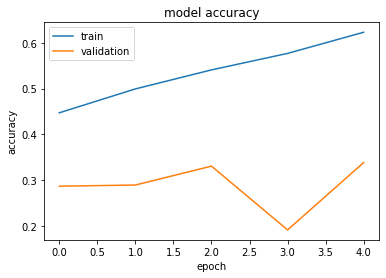

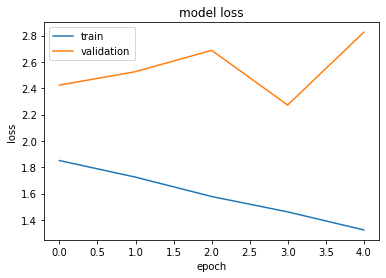

In [ ]:
# summarize history for accuracy
plt.plot(history.history['dense_accuracy'])
plt.plot(history.history['val_dense_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predictions
yval, yaro, yexpr = model.predict(X_test)

In [ ]:
from numpy import argmax
from sklearn.metrics import accuracy_score
yaccu = argmax(yexpr, axis=-1).astype('int')

In [ ]:
accuracy = accuracy_score(Y_test_exp, yaccu)

In [ ]:
#Accuracy
accuracy

0.14643304130162704

In [ ]:
#CohenKappa
metric = tfa.metrics.CohenKappa(num_classes=8, sparse_labels=True)
metric.update_state(Y_test_exp, yexpr)
result = metric.result()
result.numpy()

0.024320364

In [ ]:
#F1 Score
from sklearn.metrics import classification_report

print(classification_report(Y_test_exp, yaccu))

              precision    recall  f1-score   support

           0       0.14      0.24      0.17       100
           1       0.15      0.92      0.26       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.33      0.01      0.02       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00        99

    accuracy                           0.15       799
   macro avg       0.08      0.15      0.06       799
weighted avg       0.08      0.15      0.06       799



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



AUC DenseNet


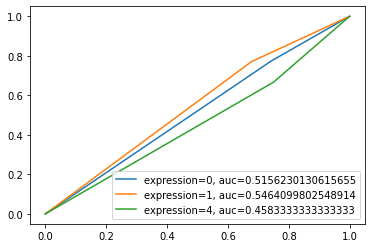

In [116]:
#ROC Curve
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import metrics

def Roc(label, pred):
  unique = [0,1, 4]
  plt.figure(0).clf()
  for x in unique:
    lis = [i for i in unique if i!= x] #remove current class except others

    #Remove other classes except current
    newLabels = [0 if x in lis else 1 for x in label]
    newPred = [0 if x in lis else 1 for x in pred]

    fpr, tpr, thresh = metrics.roc_curve(newLabels, newPred)
    auc = metrics.roc_auc_score(newLabels, newPred)
    plt.plot(fpr,tpr,label="expression="+str(x)+", auc="+str(auc))
  plt.legend(loc=0)

print("AUC DenseNet")
Roc(yaccu, Y_test_exp)

In [ ]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def MSE(label, pred):
  error1 = mean_squared_error(label, pred)
  print('MSE: %.3f' % error1)

def MAE(label, pred):
  error1 = mean_absolute_error(label, pred)
  print('MAE: %.3f' % error1)



#Valence
print("Valence")
MSE(Y_test_val, yval)
MAE(Y_test_val, yval)

#Arousal
print("Arousal")
MSE(Y_test_aro, yaro)
MAE(Y_test_aro, yaro)

Valence
MSE: 0.392
MAE: 0.520
Arousal
MSE: 0.394
MAE: 0.532


In [118]:
#Correlation Coefficient
import numpy 
def CorrCoef(label, pred):
  pre = []
  shape = pred.shape[0]
  for x in range(0, shape):
    pre.append(pred[x][0])
  pre = numpy.array(pre)
  coef = numpy.corrcoef(label, pre)
  print(str(coef))

print("DenseNet Correlation Coefficient")
print("Valence")
CorrCoef(Y_test_val, yval)
print("Arousal")
CorrCoef(Y_test_aro, yaro)



DenseNet Correlation Coefficient
Valence
[[1.         0.14998848]
 [0.14998848 1.        ]]
Arousal
[[1.         0.05847069]
 [0.05847069 1.        ]]


In [114]:
#Concordance correlation coefficient

def CCC(label, pre):    
  pred = []
  shape = pre.shape[0]
  for x in range(0, shape):
    pred.append(pre[x][0])

  # covariance between y_true and y_pred
  s_xy = np.cov([label, pred])[0,1]
  # means
  x_m = np.mean(label)
  y_m = np.mean(pred)
  # variances
  s_x_sq = np.var(label)
  s_y_sq = np.var(pred)
  
  # condordance correlation coefficient
  ccc = (2.0*s_xy) / (s_x_sq + s_y_sq + (x_m-y_m)**2)
   
  return ccc

print("Valence",CCC(Y_test_val, yval))
print("Arousal",CCC(Y_test_val, yaro))

Valence 0.08149122976226567
Arousal 0.01600451563429537


In [ ]:
from PIL import Image
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst


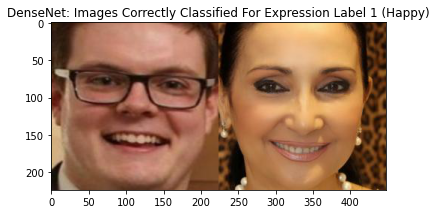

In [ ]:
#Correctly Classified Images
image = Image.open("/content/testdata/val_set/images/5150.jpg")
image2 = Image.open("/content/testdata/val_set/images/5005.jpg")
plt.imshow(get_concat_h(image, image2)) 
plt.title("DenseNet: Images Correctly Classified For Expression Label 1 (Happy)")
plt.show()

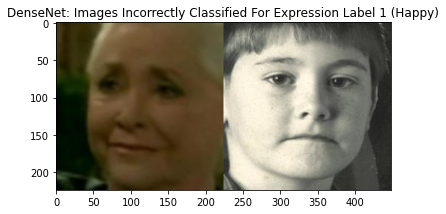

In [148]:
#Incorrectly Classified Images
image = Image.open("/content/testdata/val_set/images/4887.jpg")
image2 = Image.open("/content/testdata/val_set/images/49.jpg")
plt.imshow(get_concat_h(image, image2)) 
plt.title("DenseNet: Images Incorrectly Classified For Expression Label 1 (Happy)")
plt.show()

##ResNet

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_120 (Conv2D)            (None, 112, 112, 64  3200        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 56, 56, 64)  0           ['conv2d_120[0][0]']             
                                                                                            

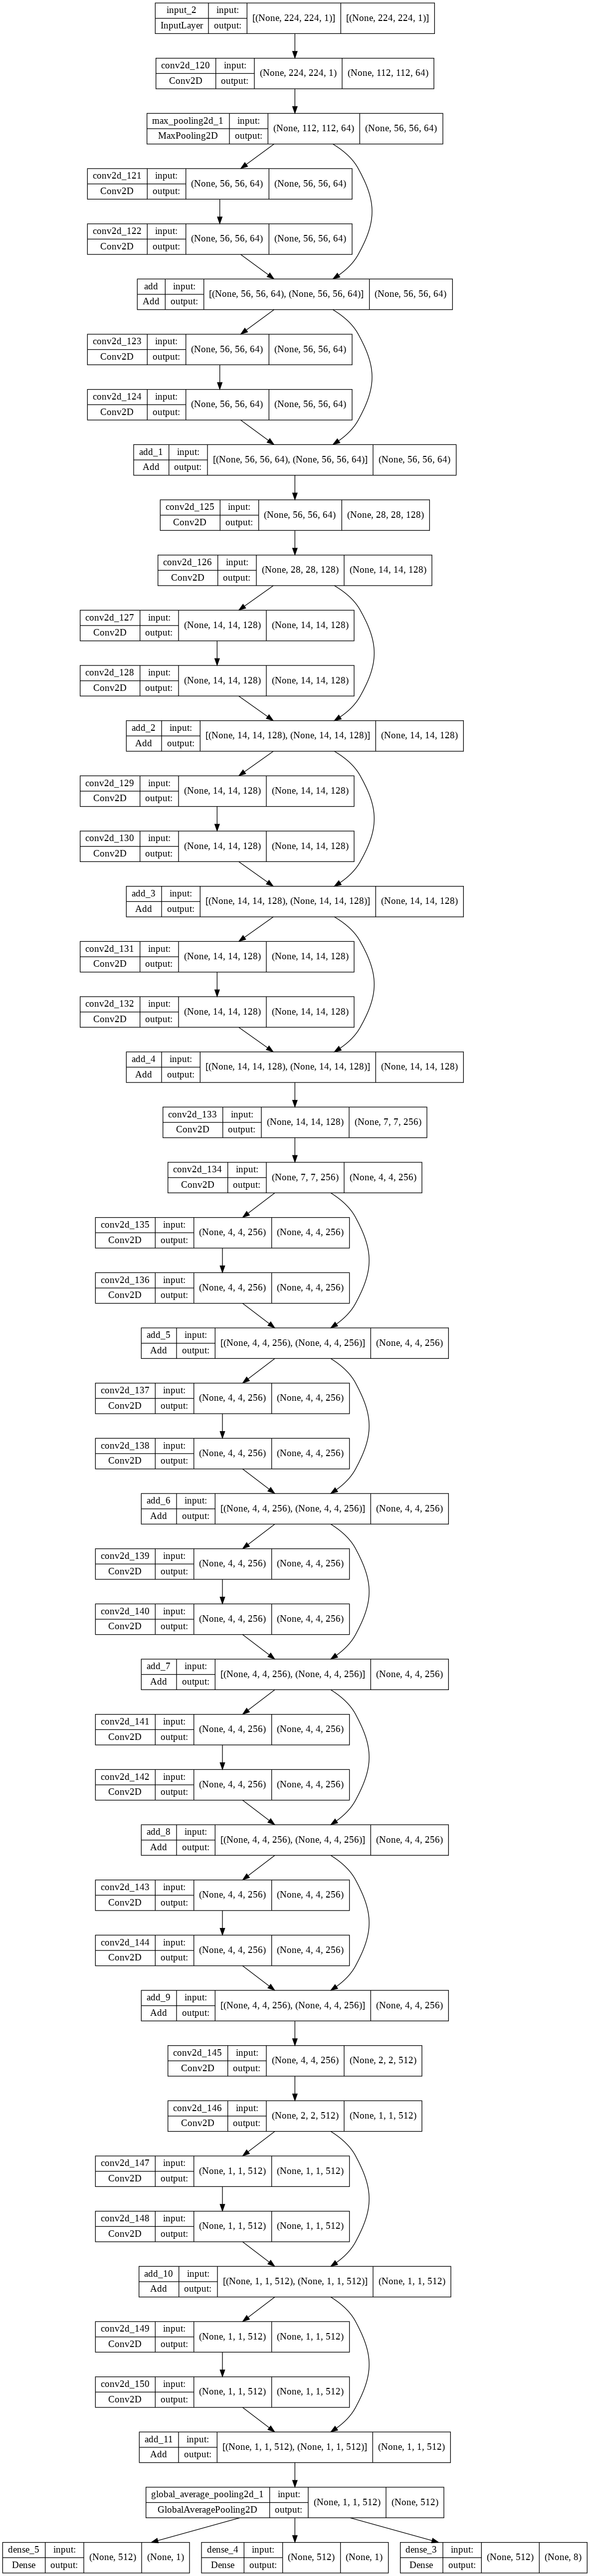

In [ ]:
#ResNet
from keras import Model
import keras.layers as layers

def resuidal_block(n_filters, x):
  #Creating resuidal block of Convolutions
  #n_filters: number of filters
  #x: input into the block
  shortcut = x #preserved input of the previous bloack
  x = layers.Conv2D(n_filters, (3,3), strides=(1,1), padding="same", activation="relu")(x)
  x = layers.Conv2D(n_filters, (3,3), strides=(1,1), padding="same", activation="relu")(x)
  x = layers.add([shortcut, x]) #adding the input of the previous block to the current one (Identity Link)
  return x

def conv_block(n_filters, x):
  #Creating Block of Convolutions without Pooling
  #n_filters: number of filters
  #x: input into the block
  x = layers.Conv2D(n_filters, (3,3), strides=(2,2), padding="same", activation="relu")(x)
  x = layers.Conv2D(n_filters, (3,3), strides=(2,2), padding="same", activation="relu")(x)
  return x

#The input tensor
inputs = layers.Input(shape=(224,224,1))

#First Convolutional layer where pooled features will be reduced by 75%
x = layers.Conv2D(64, kernel_size=(7,7), strides=(2,2), padding="same", activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same")(x)

#First Residual Block Group of 64 filters
for _ in range(2):
  x = resuidal_block(64, x)

#Double the size of the filters and reduce features maps by 75% (stride=2,2) to fit the next resuidal block
x = conv_block(128, x)

#Second Residual Block Group of 64 filters
for _ in range(3):
  x = resuidal_block(128, x)

#Double the size of the filters and reduce features maps by 75% (stride=2,2) to fit the next resuidal block
x = conv_block(256, x)

#Third Residual Block Group of 64 filters
for _ in range(5):
  x = resuidal_block(256, x)

#Double the size of the filters and reduce features maps by 75% (stride=2,2) to fit the next resuidal block
x = conv_block(512, x)

#Fourth Residual Block Group of 64 filters
for _ in range(2):
  x = resuidal_block(512, x)

#Now Pool at the end of all the convolutional resuidal blocks
x = layers.GlobalAveragePooling2D()(x)

#Final Dense Outputting layer for 1000 outputs 
clas_out = layers.Dense(8, activation="softmax")(x)
aro_out = layers.Dense(1, activation="linear")(x)
val_out = layers.Dense(1, activation="linear")(x)

model = Model(inputs, outputs=[val_out,aro_out, clas_out])

model.summary() 
plot_model(model, to_file='resnet.png', show_shapes=True)

In [ ]:
#model = Model(inputs=inputs, outputs=[out_val, out_aro, out_class])
model.compile(loss=['mse','mse', 'categorical_crossentropy'], optimizer='adam', metrics=['mae', 'mse', 'accuracy'] )

In [ ]:
history2 = model.fit(X_train,[y_vale_train, y_aro_train, y_train_exp], validation_data=(X_val, [y_vale_val, y_aro_val, y_val_exp]), epochs=5, batch_size=70, verbose=1)

Epoch 1/5
34/34 [==============================] - 490s 14s/step - loss: 15.8381 - dense_5_loss: 0.3949 - dense_4_loss: 13.4649 - dense_3_loss: 1.9782 - dense_5_mae: 0.4653 - dense_5_mse: 0.3949 - dense_5_accuracy: 0.0293 - dense_4_mae: 0.9094 - dense_4_mse: 13.4649 - dense_4_accuracy: 0.0305 - dense_3_mae: 0.2049 - dense_3_mse: 0.1032 - dense_3_accuracy: 0.2816 - val_loss: 2.1512 - val_dense_5_loss: 0.2449 - val_dense_4_loss: 0.1344 - val_dense_3_loss: 1.7719 - val_dense_5_mae: 0.4031 - val_dense_5_mse: 0.2449 - val_dense_5_accuracy: 0.0353 - val_dense_4_mae: 0.3203 - val_dense_4_mse: 0.1344 - val_dense_4_accuracy: 0.0327 - val_dense_3_mae: 0.2012 - val_dense_3_mse: 0.0996 - val_dense_3_accuracy: 0.2857
Epoch 2/5
34/34 [==============================] - 478s 14s/step - loss: 2.1573 - dense_5_loss: 0.2531 - dense_4_loss: 0.1278 - dense_3_loss: 1.7764 - dense_5_mae: 0.4159 - dense_5_mse: 0.2531 - dense_5_accuracy: 0.0293 - dense_4_mae: 0.2985 - dense_4_mse: 0.1278 - dense_4_accuracy: 0.

In [ ]:
print(history2.history.keys())

dict_keys(['loss', 'dense_5_loss', 'dense_4_loss', 'dense_3_loss', 'dense_5_mae', 'dense_5_mse', 'dense_5_accuracy', 'dense_4_mae', 'dense_4_mse', 'dense_4_accuracy', 'dense_3_mae', 'dense_3_mse', 'dense_3_accuracy', 'val_loss', 'val_dense_5_loss', 'val_dense_4_loss', 'val_dense_3_loss', 'val_dense_5_mae', 'val_dense_5_mse', 'val_dense_5_accuracy', 'val_dense_4_mae', 'val_dense_4_mse', 'val_dense_4_accuracy', 'val_dense_3_mae', 'val_dense_3_mse', 'val_dense_3_accuracy'])


###ResNet Metrics

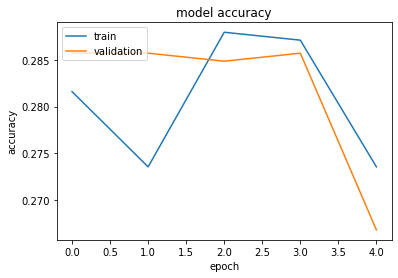

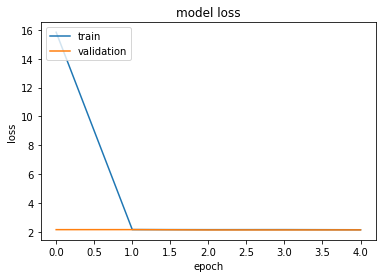

In [115]:
# summarize history for accuracy
plt.plot(history2.history['dense_3_accuracy'])
plt.plot(history2.history['val_dense_3_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [100]:
#Predictions
zval, zaro, zexpr = model.predict(X_test)

In [101]:
from numpy import argmax
from sklearn.metrics import accuracy_score
zaccu = argmax(zexpr, axis=-1).astype('int')

In [102]:
accuracy = accuracy_score(Y_test_exp, zaccu)

In [103]:
#Accuracy
accuracy

0.1214017521902378

In [104]:
#CohenKappa
metric = tfa.metrics.CohenKappa(num_classes=8, sparse_labels=True)
metric.update_state(Y_test_exp, zexpr)
result = metric.result()
result.numpy()

-0.004291773

In [105]:
#F1 Score
from sklearn.metrics import classification_report

print(classification_report(Y_test_exp, zaccu))

              precision    recall  f1-score   support

           0       0.12      0.88      0.21       100
           1       0.13      0.09      0.11       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00        99

    accuracy                           0.12       799
   macro avg       0.03      0.12      0.04       799
weighted avg       0.03      0.12      0.04       799



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



AUC ResNet


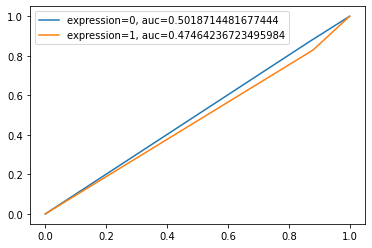

In [117]:
#ROC Curve
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import metrics

def Roc(label, pred):
  unique = [0,1]
  plt.figure(0).clf()
  for x in unique:
    lis = [i for i in unique if i!= x] #remove current class except others

    #Remove other classes except current
    newLabels = [0 if x in lis else 1 for x in label]
    newPred = [0 if x in lis else 1 for x in pred]

    fpr, tpr, thresh = metrics.roc_curve(newLabels, newPred)
    auc = metrics.roc_auc_score(newLabels, newPred)
    plt.plot(fpr,tpr,label="expression="+str(x)+", auc="+str(auc))
  plt.legend(loc=0)

print("AUC ResNet")
Roc(zaccu, Y_test_exp)

In [107]:
#Mean Squared Error
#Mean Absolute Error

#Valence
print("Valence")
MSE(Y_test_val, zval)
MAE(Y_test_val, zval)

#Arousal
print("Arousal")
MSE(Y_test_aro, zaro)
MAE(Y_test_aro, zaro)

Valence
MSE: 0.245
MAE: 0.413
Arousal
MSE: 0.171
MAE: 0.370


In [119]:
#Correlation Coefficient
print("ResNet Correlation Coefficient")
print("Valence")
CorrCoef(Y_test_val, zval)
print("Arousal")
CorrCoef(Y_test_aro, zaro)



ResNet Correlation Coefficient
Valence
[[1.         0.11808174]
 [0.11808174 1.        ]]
Arousal
[[1.         0.03291315]
 [0.03291315 1.        ]]


In [113]:
#Concordance correlation coefficient
print("Valence:",CCC(Y_test_val, zval))
print("Aruosal:", CCC(Y_test_val, zaro))

Valence: 0.0028046518211094413
Aruosal: 0.002179346271477166


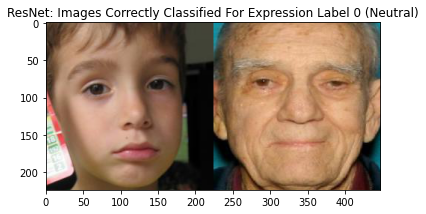

In [172]:
#Correctly Classified Images
image = Image.open("/content/testdata/val_set/images/4990.jpg")
image2 = Image.open("/content/testdata/val_set/images/499.jpg")
plt.imshow(get_concat_h(image, image2)) 
plt.title("ResNet: Images Correctly Classified For Expression Label 0 (Neutral)")
plt.show()

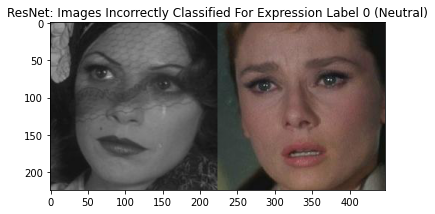

In [173]:
#Incorrectly Classified Images
image = Image.open("/content/testdata/val_set/images/4908.jpg")
image2 = Image.open("/content/testdata/val_set/images/4941.jpg")
plt.imshow(get_concat_h(image, image2)) 
plt.title("ResNet: Images Incorrectly Classified For Expression Label 0 (Neutral)")
plt.show()